<a href="https://colab.research.google.com/github/tainguyen30/AI-2022-2023/blob/main/Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Khai báo và sử dụng các thư viện sau
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/DATA/Face

/content/drive/MyDrive/Colab Notebooks/DATA/Face


In [3]:
from numpy import asarray

folder = '/content/drive/MyDrive/Colab Notebooks/DATA/Face/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('tien'):
    output = 0
  if file.startswith('thai'):
    output = 1
  if file.startswith('TanDat'):
    output = 2
  if file.startswith('SonTung'):
    output = 3
  if file.startswith('sang'):
    output = 4
  if file.startswith('pqhuy'):
    output = 5
  if file.startswith('Phuc'):
    output = 6
  if file.startswith('Phat'):
    output = 7
  if file.startswith('NTKiet'):
    output = 8
  if file.startswith('ngocThach'):
    output = 9
  if file.startswith('minh'):
    output = 10
  if file.startswith('kiet'):
    output = 11
  if file.startswith('HuuLong'):
    output = 12
  if file.startswith('HQHuy'):
    output = 13
  if file.startswith('Hoang'):
    output = 14
  if file.startswith('hoaifong'):
    output = 15
  if file.startswith('Hieu'):
    output = 16
  if file.startswith('hau'):
    output = 17
  if file.startswith('hakiet'):
    output = 18
  if file.startswith('Ha'):
    output = 19
  if file.startswith('dung'):
    output = 20
  if file.startswith('DangKhoa'):
    output = 21
  if file.startswith('QuangPhuc'):
    output = 22
  photo = load_img(folder + file, target_size=(40, 40))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/DATA/Face/Face_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/DATA/Face/Face_labels.npy', labels)

(1439, 40, 40, 3) (1439,)


In [11]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Colab Notebooks/DATA/Face/Face_photos.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/DATA/Face/Face_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [19]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (40,40,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(23, activation= 'softmax'))  # Total output = 23
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 128)      

In [20]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [23]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=50,
                               validation_data=aug.flow(x_test,y_test,
                               batch_size=len(x_test)))

#Save model
model.save('/content/drive/MyDrive/Colab Notebooks/DATA/Face.h5')

Epoch 1/50
 1/16 [>.............................] - ETA: 1s - loss: 0.0315 - accuracy: 0.9844

<ipython-input-23-46dfb577bcfe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


16/16 [==============================] - 2s 120ms/step - loss: 0.0488 - accuracy: 0.9841 - val_loss: 0.0967 - val_accuracy: 0.9745
Epoch 2/50
16/16 [==============================] - 1s 90ms/step - loss: 0.0620 - accuracy: 0.9841 - val_loss: 0.1172 - val_accuracy: 0.9676
Epoch 3/50
16/16 [==============================] - 2s 99ms/step - loss: 0.1178 - accuracy: 0.9633 - val_loss: 0.1632 - val_accuracy: 0.9653
Epoch 4/50
16/16 [==============================] - 2s 120ms/step - loss: 0.0617 - accuracy: 0.9782 - val_loss: 0.0784 - val_accuracy: 0.9769
Epoch 5/50
16/16 [==============================] - 1s 89ms/step - loss: 0.0496 - accuracy: 0.9841 - val_loss: 0.0688 - val_accuracy: 0.9815
Epoch 6/50
16/16 [==============================] - 1s 85ms/step - loss: 0.0404 - accuracy: 0.9881 - val_loss: 0.0931 - val_accuracy: 0.9745
Epoch 7/50
16/16 [==============================] - 1s 88ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.1258 - val_accuracy: 0.9653
Epoch 8/50
16/16 [====

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

14/14 [==============================] - 0s 17ms/step - loss: 38.2426 - accuracy: 0.9421
Accuracy: 0.9421296119689941
Loss: 38.24260711669922


In [29]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/DATA/Face.h5')

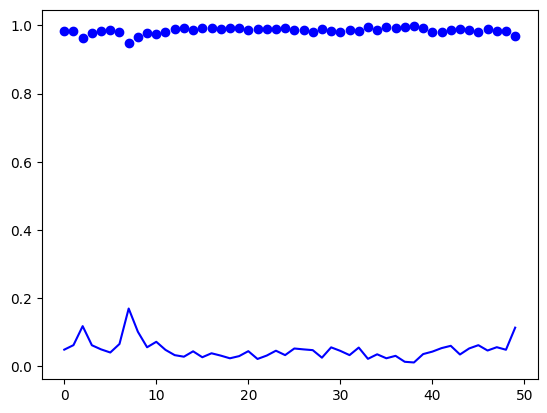

In [30]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()
     

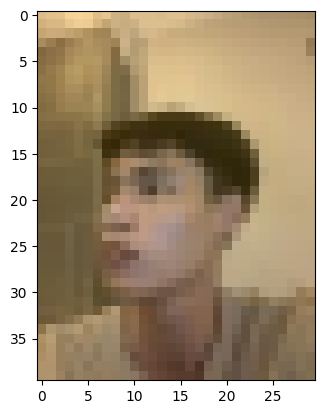

In [36]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
url = "/content/drive/MyDrive/Colab Notebooks/DATA/Face/Ha58.jpg"
img = load_img(url)
imshow(img)

1/1 [==============================] - 0s 18ms/step
Ha


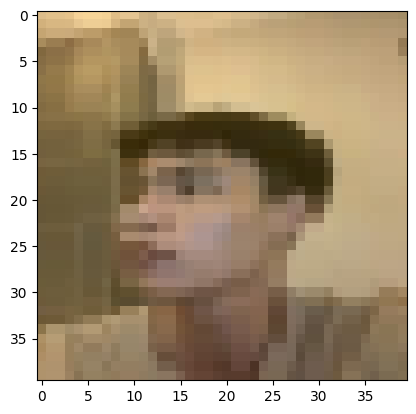

In [37]:
img = load_img(url, target_size = (40,40))
imshow(img)
img = img_to_array(img)
img = img.reshape(1,40,40,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img), axis = -1)
if(a == array([0])):
  print("Tien")
if(a == array([1])):
  print("Thai")
if(a == array([2])):
  print("Tan Dat")
if(a == array([3])):
  print("Son Tung")
if(a == array([4])):
  print("Sang")
if(a == array([5])):
  print("PQ Huy")
if(a == array([6])):
  print("Phuc")
if(a == array([7])):
  print("Phat")
if(a == array([8])):
  print("NT Kiet")
if(a == array([9])):
  print("Ngoc Thach")
if(a == array([10])):
  print("Minh")
if(a == array([11])):
  print("Kiet")
if(a == array([12])):
  print("Huu Long")
if(a == array([13])):
  print("HQ Huy")
if(a == array([14])):
  print("Hoang")
if(a == array([15])):
  print("Hoai Phong")
if(a == array([16])):
  print("Hieu")
if(a == array([17])):
  print("Hau")
if(a == array([18])):
  print("Ha Kiet")
if(a == array([19])):
  print("Ha")
if(a == array([20])):
  print("Dung")
if(a == array([21])):
  print("Dang Khoa")
if(a == array([22])):
  print("Quang Phuc")